In [1]:
import os
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [2]:
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [3]:
pandf = pd.read_csv("naver_stock_data.csv",sep=',', encoding='euc-kr')

In [4]:
pandf.info()
pandf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 8 columns):
날짜        1198 non-null object
종가        1198 non-null int64
전일비       1198 non-null int64
시가        1198 non-null int64
고가        1198 non-null int64
저가        1198 non-null int64
거래량       1198 non-null int64
종가 수정가    1198 non-null int64
dtypes: int64(7), object(1)
memory usage: 75.0+ KB


(1198, 8)

In [5]:
nparr = pandf['종가 수정가'].values[::-1]
nparr.astype('float32')

array([146200., 149800., 148600., ..., 180000., 173500., 178500.],
      dtype=float32)

In [6]:
#normalization
scaler = MinMaxScaler(feature_range=(0,1))
nptf = scaler.fit_transform(nparr.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
train_size = int(len(nptf)*0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))

1078 120


In [8]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dropout(0.20))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 8s - loss: 0.0941
Epoch 2/100
 - 7s - loss: 0.0636
Epoch 3/100
 - 7s - loss: 0.0721
Epoch 4/100
 - 7s - loss: 0.0580
Epoch 5/100
 - 7s - loss: 0.0641
Epoch 6/100
 - 7s - loss: 0.0621
Epoch 7/100
 - 7s - loss: 0.0628
Epoch 8/100
 - 7s - loss: 0.0585
Epoch 9/100
 - 7s - loss: 0.0637
Epoch 10/100
 - 7s - loss: 0.0519
Epoch 11/100
 - 6s - loss: 0.0654
Epoch 12/100
 - 6s - loss: 0.0567
Epoch 13/100
 - 7s - loss: 0.0602
Epoch 14/100
 - 7s - loss: 0.0600
Epoch 15/100
 - 8s - loss: 0.0590
Epoch 16/100
 - 7s - loss: 0.0598
Epoch 17/100
 - 7s - loss: 0.0586
Epoch 18/100
 - 7s - loss: 0.0626
Epoch 19/100
 - 7s - loss: 0.0628
Epoch 20/100
 - 7s - loss: 0.0621
Epoch 21/100
 - 10s - loss: 0.0566
Epoch 22/100
 - 8s - loss: 0.0673
Epoch 23/100
 - 7s - loss: 0.0561
Epoch 24/100
 - 8s - loss: 0.0593
Epoch 25/100
 - 8s - loss: 0.0578
Epoch 26/100
 - 8s - loss: 0.0575
Epoch 27/100
 - 9s - loss: 0.0645
Epoch 28/100
 - 7s - loss: 0.0612
Epoch 29/100
 - 7s - loss: 0.0593
Epoch 30/100
 - 7s - l

In [15]:
testPredict = model.predict(testX)
testPredict_inverse = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY_inverse, testPredict_inverse))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 11204.19 RMSE


In [16]:
lastX = nptf[-1]
lastX = np.reshape(lastX, (1,1,1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)

Predict the Close value of final day: 159803


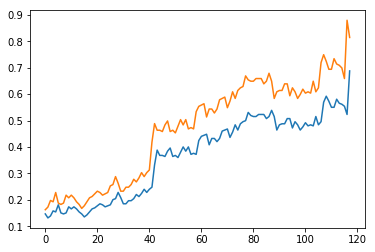

In [17]:
plt.plot(testPredict)
plt.plot(testY)
plt.show()